**Import de librairires**

In [1]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split


In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13379236965218258309
xla_global_id: -1
]


**Chargement des données**

In [3]:
#Domicile
# train_dir = 'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_train/asl_alphabet_train'
# test_dir = 'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test/asl_alphabet_test'

In [4]:
#ICAM
train_dir = 'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test2'

In [5]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of del ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of nothing ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of space ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...


In [6]:
print(len(X), len(y))

87000 87000


**Visualisation des données**

In [7]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 640x480 with 0 Axes>

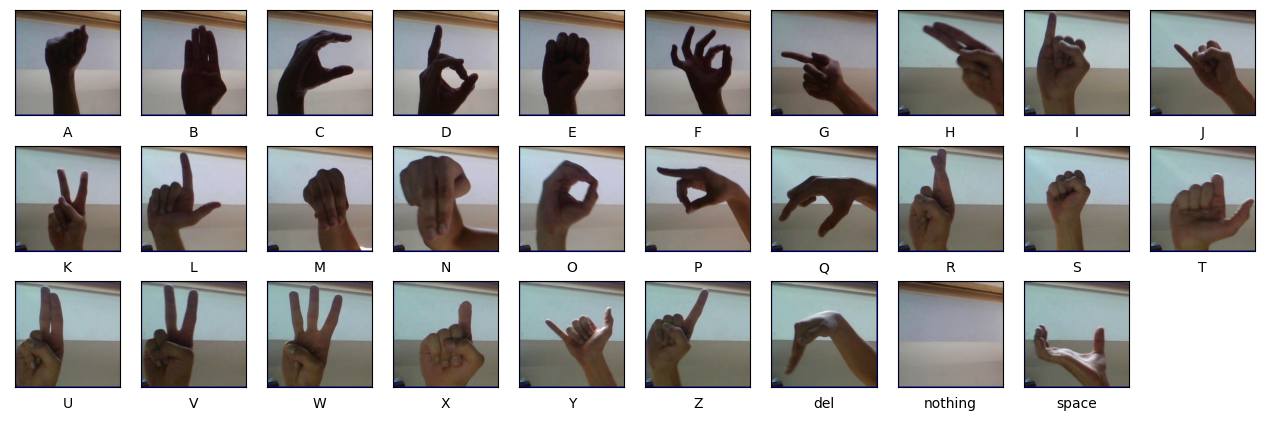

In [8]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

**Pre traitement des données**

In [9]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [10]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


**Definition du reseau de neuronne convolutionnel (CNN)**

In [11]:
classes = 29
batch = 32
epochs = 3
learning_rate = 0.001

In [12]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [13]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model.summary() #Architecture du reseau de neuronne

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        

**Entrainer le modele**

In [15]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/3
1958/1958 [==============================] - 247s 126ms/step - loss: 0.5875 - accuracy: 0.8248 - val_loss: 0.6586 - val_accuracy: 0.8344
Epoch 2/3
1958/1958 [==============================] - 243s 124ms/step - loss: 0.1204 - accuracy: 0.9636 - val_loss: 0.1720 - val_accuracy: 0.9440
Epoch 3/3
1958/1958 [==============================] - 249s 127ms/step - loss: 0.0889 - accuracy: 0.9750 - val_loss: 0.1726 - val_accuracy: 0.9495


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 9s 32ms/step - loss: 0.1741 - accuracy: 0.9494
Test accuracy: 0.9494252800941467
Test loss: 0.1741260290145874


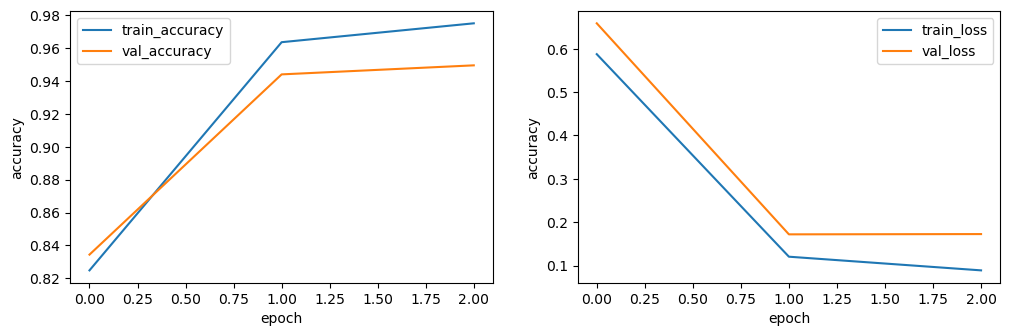

In [17]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [18]:
pred = model.predict(x_test)

272/272 [==============================] - 8s 30ms/step


In [19]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

(78300, 29)

(8700, 29)

(8700, 29)

In [20]:
y_test2=np.argmax(y_test,axis=1)
y_pred = np.argmax(pred, axis=1)

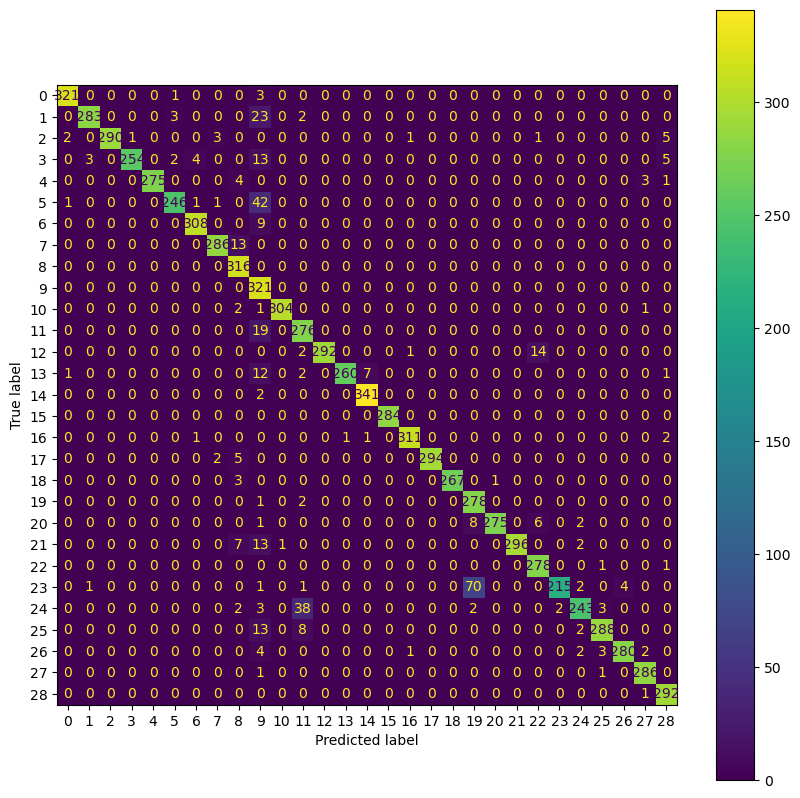

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test2,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_test2, y_pred,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
score_classification_report_CNN=classification_report_CNN['macro avg']
classification_report_CNN

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,accuracy,macro avg,weighted avg
precision,0.987692,0.986063,1.000000,0.996078,1.000000,0.976190,0.980892,0.979452,0.897727,0.665975,...,0.929766,0.990783,0.960474,0.972973,0.985915,0.976109,0.951140,0.949425,0.958772,0.958434
recall,0.987692,0.909968,0.957096,0.903915,0.971731,0.845361,0.971609,0.956522,1.000000,1.000000,...,0.992857,0.731293,0.829352,0.926045,0.958904,0.993056,0.996587,0.949425,0.948884,0.949425
f1-score,0.987692,0.946488,0.978078,0.947761,0.985663,0.906077,0.976228,0.967851,0.946108,0.799502,...,0.960276,0.841487,0.890110,0.948929,0.972222,0.984509,0.973333,0.949425,0.950628,0.950701
support,325.000000,311.000000,303.000000,281.000000,283.000000,291.000000,317.000000,299.000000,316.000000,321.000000,...,280.000000,294.000000,293.000000,311.000000,292.000000,288.000000,293.000000,0.949425,8700.000000,8700.000000


**Changement du jeu de données test**

In [23]:
# path = "C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test2/asl_alphabet_test2"

In [24]:
# files = os.listdir(path)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test2/asl_alphabet_test2'

**Transformer les photos de base en niveau de gris**

In [ ]:
# from PIL import Image

# for file in files:
#     #print(file)
#     image=Image.open(path +"/"+ file)
#     gray_image=image.convert("L")
#     gray_image.save(path+"/"+file)


In [ ]:
#Domicile
# train_dir = 'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_train/asl_alphabet_train'
# test_dir = 'C:/Users/thiba/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test2/asl_alphabet_test2'

In [26]:
#ICAM
train_dir = 'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test_perso'

In [27]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of del ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of nothing ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of space ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...


In [28]:
print(len(X), len(y))

87000 87000


**Visualisation des données**

In [29]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del','nothing', 'space']

<Figure size 640x480 with 0 Axes>

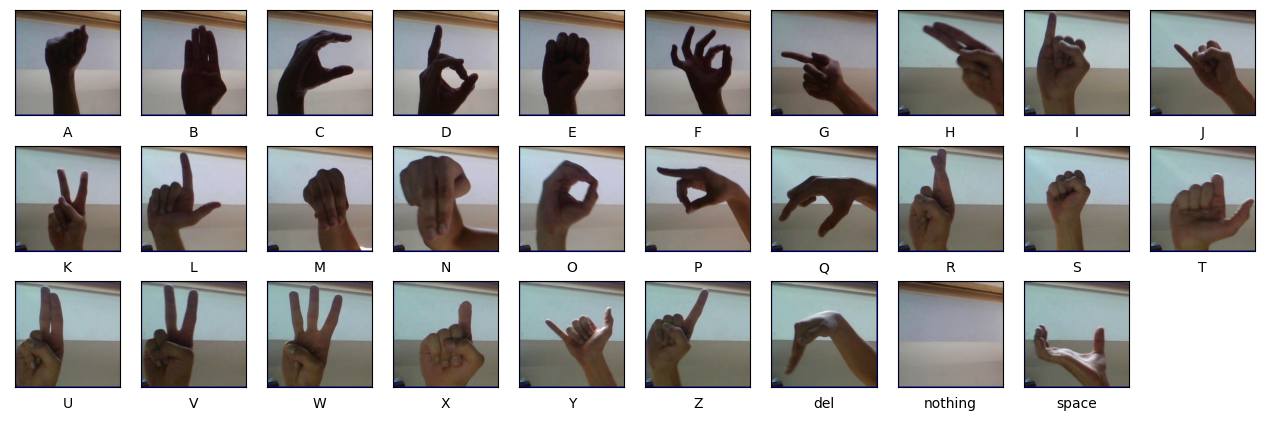

In [30]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
#         path = test_dir + "/{0}/{0}1.jpg".format(classes[i])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

TypeError: 'int' object is not subscriptable

<Figure size 640x480 with 0 Axes>

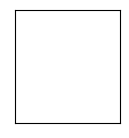

In [47]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = test_dir + "/{0}_test.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

**Pre traitement des données**

In [32]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [33]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


**Definition du reseau de neuronne convolutionnel (CNN)**

In [34]:
classes = 29
batch = 32
epochs = 3
learning_rate = 0.001

In [35]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [36]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
model.summary() #Architecture du reseau de neuronne

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                      

**Entrainer le modele**

In [38]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/3
1958/1958 [==============================] - 251s 128ms/step - loss: 0.5926 - accuracy: 0.8220 - val_loss: 0.7373 - val_accuracy: 0.8185
Epoch 2/3
1958/1958 [==============================] - 262s 134ms/step - loss: 0.1263 - accuracy: 0.9606 - val_loss: 0.7217 - val_accuracy: 0.8452
Epoch 3/3
1958/1958 [==============================] - 259s 132ms/step - loss: 0.0868 - accuracy: 0.9754 - val_loss: 0.0893 - val_accuracy: 0.9761


In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 9s 32ms/step - loss: 0.0877 - accuracy: 0.9741
Test accuracy: 0.9741379022598267
Test loss: 0.08774202316999435


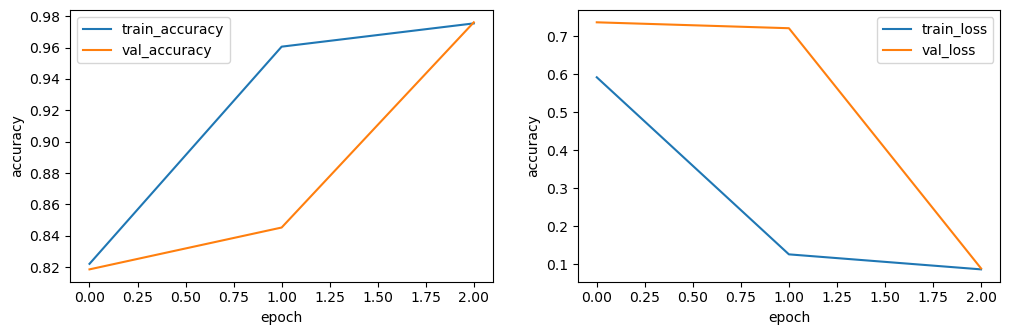

In [40]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [41]:
pred = model.predict(x_test)

272/272 [==============================] - 8s 30ms/step


In [42]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

(78300, 29)

(8700, 29)

(8700, 29)

In [43]:
y_test2=np.argmax(y_test,axis=1)
y_pred = np.argmax(pred, axis=1)

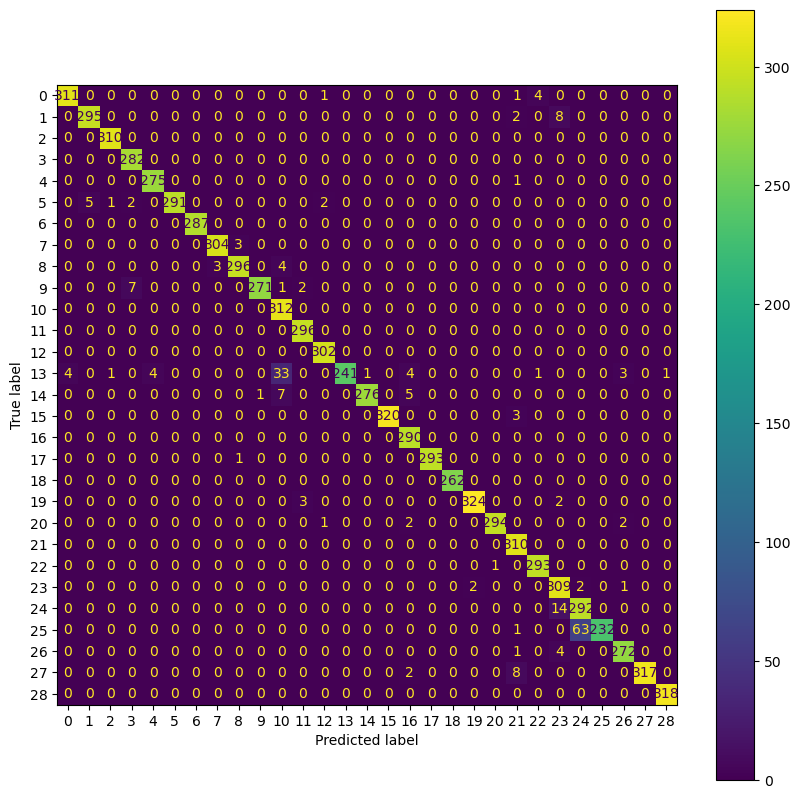

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test2,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test2, y_pred,output_dict=True)

classification_report_CNN_Perso = pd.DataFrame.from_dict(report)
score_classification_report_CNN_Perso =classification_report_CNN['macro avg']
classification_report_CNN_Perso

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,accuracy,macro avg,weighted avg
precision,0.987302,0.983333,0.993590,0.969072,0.985663,1.000000,1.0,0.990228,0.986667,0.996324,...,0.983221,0.916914,0.817927,1.000000,0.978417,1.000000,0.996865,0.974138,0.976613,0.976278
recall,0.981073,0.967213,1.000000,1.000000,0.996377,0.966777,1.0,0.990228,0.976898,0.964413,...,0.996599,0.984076,0.954248,0.783784,0.981949,0.969419,1.000000,0.974138,0.974000,0.974138
f1-score,0.984177,0.975207,0.996785,0.984293,0.990991,0.983108,1.0,0.990228,0.981758,0.980108,...,0.989865,0.949309,0.880845,0.878788,0.980180,0.984472,0.998430,0.974138,0.974084,0.973988
support,317.000000,305.000000,310.000000,282.000000,276.000000,301.000000,287.0,307.000000,303.000000,281.000000,...,294.000000,314.000000,306.000000,296.000000,277.000000,327.000000,318.000000,0.974138,8700.000000,8700.000000
